##### This is a Machine Learning Project on employee turnover. 
The data is a random data. It was analysed using decison tree and KNN (Standard Scaler). 
Every null data was replaced with the mean value of the column in which the data appared. 
Also data visulization of the data was done using seaborn and plotly. After that data preprocessing was done before model classification was done to predict which of the employees will stay or leave the organization based on the parameters available. 

In [1]:
# Get all relevant libraries to analyse the dataframe 
import pandas as pd 
import numpy as np 

In [2]:
# To read the csv file 
Hr= pd.read_csv("Desktop\One piece\Python\DSProjects\Employee turnover\hr_data.csv")

In [3]:
# To check the first five rows of the dataframe 
Hr.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,0,1,0,sales,low
1,1005,5,262,6,0,1,0,sales,medium
2,1486,7,272,4,0,1,0,sales,medium
3,1038,5,223,5,0,1,0,sales,low
4,1057,2,159,3,0,1,0,sales,low


In [4]:
Hr.shape

(14999, 9)

In [5]:
# to get the overview of the information that the dataframe is made out of 
Hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   employee_id            14999 non-null  int64 
 1   number_project         14999 non-null  int64 
 2   average_montly_hours   14999 non-null  int64 
 3   time_spend_company     14999 non-null  int64 
 4   Work_accident          14999 non-null  int64 
 5   left                   14999 non-null  int64 
 6   promotion_last_5years  14999 non-null  int64 
 7   department             14999 non-null  object
 8   salary                 14999 non-null  object
dtypes: int64(7), object(2)
memory usage: 1.0+ MB


In [6]:
# To know the categories in which department and salary is divided into 
Hr["department"].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [7]:
Hr["salary"].unique()

array(['low', 'medium', 'high'], dtype=object)

In [8]:
# read the other file satisfaction level 
Satisfaction = pd.read_excel("Desktop\One piece\Python\DSProjects\Employee turnover\employee_satisfaction_evaluation.xlsx")

In [9]:
Satisfaction.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [10]:
# To merge both dataframe together we use the join function then we set index as one of the columns that is common to both dataframe "employee id"
Df = Hr.set_index("employee_id").join(Satisfaction.set_index("EMPLOYEE #"))

In [11]:
Df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
employee_id,,,,,,,,,,
1003,2,157,3,0,1,0,sales,low,0.38,0.53
1005,5,262,6,0,1,0,sales,medium,0.80,0.86
1486,7,272,4,0,1,0,sales,medium,0.11,0.88
1038,5,223,5,0,1,0,sales,low,0.72,0.87
1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [12]:
# to set the index of the dataframe 
Df = Df.reset_index()

In [13]:
Df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,1003,2,157,3,0,1,0,sales,low,0.38,0.53
1,1005,5,262,6,0,1,0,sales,medium,0.80,0.86
2,1486,7,272,4,0,1,0,sales,medium,0.11,0.88
3,1038,5,223,5,0,1,0,sales,low,0.72,0.87
4,1057,2,159,3,0,1,0,sales,low,0.37,0.52


In [14]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            14999 non-null  int64  
 1   number_project         14999 non-null  int64  
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  int64  
 4   Work_accident          14999 non-null  int64  
 5   left                   14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   department             14999 non-null  object 
 8   salary                 14999 non-null  object 
 9   satisfaction_level     14972 non-null  float64
 10  last_evaluation        14972 non-null  float64
dtypes: float64(2), int64(7), object(2)
memory usage: 1.3+ MB


In [15]:
Df.isnull().any()

employee_id              False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
satisfaction_level        True
last_evaluation           True
dtype: bool

# Numerical Analysis of Data 

In [16]:
# to get the description of the dataframe 
Df.describe()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14972.000000,14972.000000
mean,45424.627575,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,0.612830,0.716125
std,25915.900127,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.248714,0.171138
min,1003.000000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.090000,0.360000
25%,22872.500000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,0.440000,0.560000
50%,45448.000000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,0.640000,0.720000
75%,67480.500000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,0.820000,0.870000
max,99815.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# so fill the empty space with the mean value of the series/column 
Df.fillna(Df.mean(),inplace=True)

In [18]:
Df.isnull().any()

employee_id              False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
department               False
salary                   False
satisfaction_level       False
last_evaluation          False
dtype: bool

In [19]:
# To drop the employee Id column 
Df.drop(columns="employee_id", inplace=True)

In [20]:
Df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,0,1,0,sales,low,0.38,0.53
1,5,262,6,0,1,0,sales,medium,0.80,0.86
2,7,272,4,0,1,0,sales,medium,0.11,0.88
3,5,223,5,0,1,0,sales,low,0.72,0.87
4,2,159,3,0,1,0,sales,low,0.37,0.52


In [21]:
# to group each employee according to their department and find the sum of the department according to the various sections available  
Df.groupby("department").sum()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,4683,248119,4256,164,273,3,758.17283,879.452250
RandD,3033,158030,2650,134,121,27,487.80000,560.446125
accounting,2934,154292,2702,96,204,14,446.68283,550.706125
hr,2701,146828,2480,89,215,15,442.53566,524.006125
management,2432,126787,2711,103,91,69,391.76566,456.234499
marketing,3164,171073,3063,138,203,43,530.62283,613.946125
product_mng,3434,180369,3135,132,198,0,559.19566,644.662250
sales,15634,831773,14631,587,1014,100,2543.77981,2938.236749
support,8479,447490,7563,345,555,20,1377.90849,1611.534499


In [22]:
# tO know the numebr of employees in each department we use the "value_count" function 
Df.department.value_counts()
# Note you an not call department column by using Df("department").value_counts() only by using Df["department"].value_counts() because it is a list 

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64

In [23]:
# to know the number of employees that left the company 
Df.left.value_counts() 
# the is need to take note that 1 - employees that left, 0 - employees that stayed \

0    11428
1     3571
Name: left, dtype: int64

# Visulization of the Data

In [24]:
# get all the data visualization libraries 
import matplotlib.pyplot as plt 
import seaborn as sns 

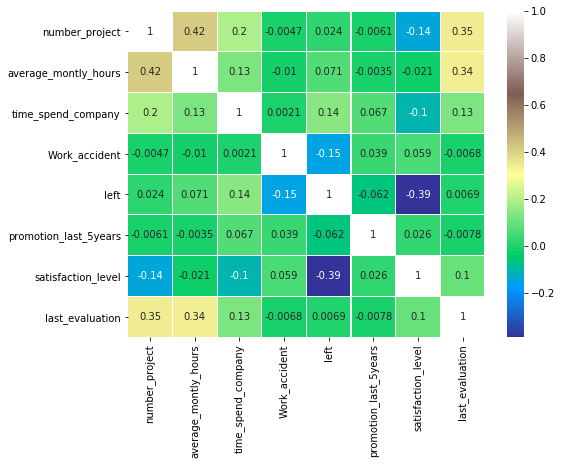

In [25]:
# There are two ways to do the correlation heatmap. Cell 25 shows when each columns name is wrtten down while column 26 show when nothing is specified. 
# Heat map correlation 
# create a correlation heatmap 
sns.heatmap(Df[["number_project", "average_montly_hours", "time_spend_company", "Work_accident", "left", "promotion_last_5years", "satisfaction_level", "last_evaluation"]].corr(),annot=True, cmap='terrain', linewidths=0.1) 
fig=plt.gcf() # "GCF" To set size in inches 
fig.set_size_inches(8,6) 
plt.show() 

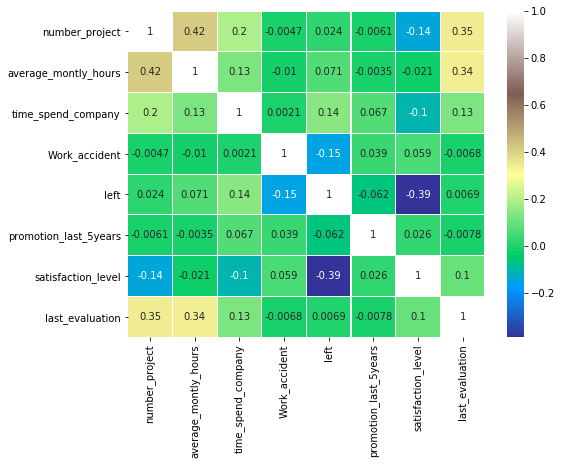

In [26]:
# create a correlation heatmap 
sns.heatmap(Df.corr(),annot=True, cmap='terrain', linewidths=0.1) 
fig=plt.gcf() # "GCF" To set size in inches 
fig.set_size_inches(8,6) 
plt.show() 

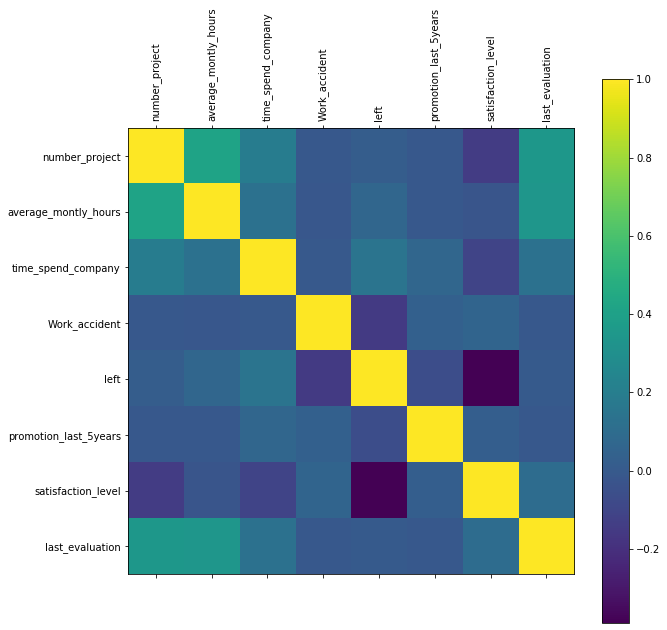

In [27]:
# create a correlation visual 
# define the function first. The call the correlation fuction 
def plot_corr(df,size=10): 
    corr=df.corr()
    fig,ax=plt.subplots(figsize=(size,size))
    cax=ax.matshow(corr)
    fig.colorbar(cax)
    plt.xticks(range(len(corr.columns)), corr.columns,rotation="vertical")
    plt.yticks(range(len(corr.columns)),corr.columns)

plot_corr(Df)

<BarContainer object of 14999 artists>

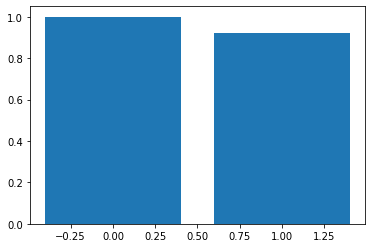

In [28]:
# Matplot lib visual 
plt.bar(x=Df["left"],height=Df["satisfaction_level"])

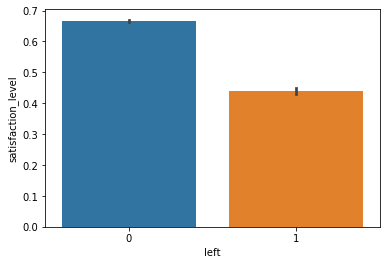

In [29]:
# Seaborn Visual 
sns.barplot(x="left", y="satisfaction_level", data=Df) 
# it is better to plot it in this way and not matplotlib because you get the best view of the number of people who want to go and who wants to remian based on the satisfaction level. 

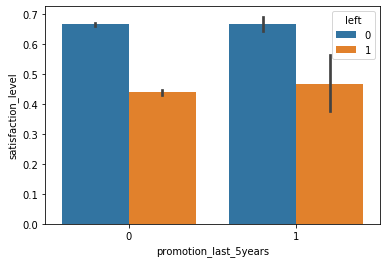

In [30]:
sns.barplot(x="promotion_last_5years", y="satisfaction_level", data=Df, hue="left")

# Data Preprocessing 

In [31]:
# In order to convert objects to numeric we do label encoding 
y = Df[["department", "salary"]]

In [32]:
y.head()

,department,salary
0,sales,low
1,sales,medium
2,sales,medium
3,sales,low
4,sales,low


In [33]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() # Stored in a variable name LE 
k = le.fit_transform(Df["salary"]) # transform salary into numerical form 

In [34]:
k

array([1, 2, 2, ..., 1, 1, 1])

In [35]:
# create another column that will show the numerical value of the salary 
Df["salary_num"] = k

In [36]:
Df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
0,2,157,3,0,1,0,sales,low,0.38,0.53,1
1,5,262,6,0,1,0,sales,medium,0.80,0.86,2
2,7,272,4,0,1,0,sales,medium,0.11,0.88,2
3,5,223,5,0,1,0,sales,low,0.72,0.87,1
4,2,159,3,0,1,0,sales,low,0.37,0.52,1


In [37]:
Df.loc[Df["salary"]=="high"]

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation,salary_num
72,2,149,3,0,1,0,product_mng,high,0.61283,0.716125,0
111,6,289,4,0,1,0,hr,high,0.09000,0.850000,0
189,2,156,3,0,1,0,technical,high,0.44000,0.510000,0
267,2,129,3,0,1,0,technical,high,0.45000,0.530000,0
306,2,149,3,0,1,0,marketing,high,0.37000,0.460000,0
...,...,...,...,...,...,...,...,...,...,...,...
14829,2,148,3,0,1,0,marketing,high,0.45000,0.570000,0
14868,2,130,3,0,1,0,support,high,0.43000,0.550000,0
14902,2,159,3,0,1,0,hr,high,0.45000,0.460000,0
14941,2,131,3,0,1,0,RandD,high,0.43000,0.490000,0


In [38]:
# drop the salary series 
Df.drop(["salary"], axis=1, inplace=True)

In [39]:
Df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation,salary_num
0,2,157,3,0,1,0,sales,0.38,0.53,1
1,5,262,6,0,1,0,sales,0.80,0.86,2
2,7,272,4,0,1,0,sales,0.11,0.88,2
3,5,223,5,0,1,0,sales,0.72,0.87,1
4,2,159,3,0,1,0,sales,0.37,0.52,1


In [40]:
o = le.fit_transform(Df["department"]) # transform department into numerical form 

In [41]:
o

array([7, 7, 7, ..., 8, 8, 8])

In [42]:
# create another column that will show the numerical value of the department 
Df["department_num"] = o

In [43]:
Df

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,sales,0.38,0.53,1,7
1,5,262,6,0,1,0,sales,0.80,0.86,2,7
2,7,272,4,0,1,0,sales,0.11,0.88,2,7
3,5,223,5,0,1,0,sales,0.72,0.87,1,7
4,2,159,3,0,1,0,sales,0.37,0.52,1,7
...,...,...,...,...,...,...,...,...,...,...,...
14994,2,151,3,0,1,0,support,0.40,0.57,1,8
14995,2,160,3,0,1,0,support,0.37,0.48,1,8
14996,2,143,3,0,1,0,support,0.37,0.53,1,8
14997,6,280,4,0,1,0,support,0.11,0.96,1,8


In [44]:
# drop the department series 
Df.drop(["department"], axis=1, inplace=True)

In [45]:
Df.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,1,0,0.38,0.53,1,7
1,5,262,6,0,1,0,0.80,0.86,2,7
2,7,272,4,0,1,0,0.11,0.88,2,7
3,5,223,5,0,1,0,0.72,0.87,1,7
4,2,159,3,0,1,0,0.37,0.52,1,7


#### It is important to note that the target variable for this ML project is to predict which staff left or stayed in the organization

In [46]:
# Since we are to predict the number of employees that left the organization we drop the left column from the main DataFrame 
x = Df.drop(["left"], axis=1)

In [47]:
x.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
0,2,157,3,0,0,0.38,0.53,1,7
1,5,262,6,0,0,0.80,0.86,2,7
2,7,272,4,0,0,0.11,0.88,2,7
3,5,223,5,0,0,0.72,0.87,1,7
4,2,159,3,0,0,0.37,0.52,1,7


In [48]:
y = Df["left"]

In [49]:
y

0        1
1        1
2        1
3        1
4        1
        ..
14994    1
14995    1
14996    1
14997    1
14998    1
Name: left, Length: 14999, dtype: int64

In [50]:
# We also have to split X and Y for 70% training and 30% testing 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [51]:
# if you take a look at the dataframe you will notice that x train is more than x test therefore making x train 70% 
x_train

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
6081,4,267,6,0,0,0.17,0.50,0,8
4498,4,143,6,1,0,0.85,0.58,2,0
10440,5,111,4,0,0,0.87,0.73,0,4
9098,4,228,3,0,0,0.96,0.52,1,7
11463,4,246,3,0,1,0.80,0.70,1,5
...,...,...,...,...,...,...,...,...,...
3194,5,177,2,0,0,0.57,0.65,0,0
14202,2,235,7,0,0,0.60,0.53,2,0
1619,2,151,3,0,0,0.39,0.48,1,7
12157,6,305,4,0,0,0.11,0.92,1,9


In [52]:
x_test

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,salary_num,department_num
777,6,294,4,0,0,0.11,0.93,2,7
2430,3,200,3,1,0,0.93,0.53,1,6
3417,2,172,3,0,0,0.71,0.69,2,9
7799,4,274,6,0,0,0.17,0.50,2,7
14481,2,127,3,0,0,0.44,0.51,2,9
...,...,...,...,...,...,...,...,...,...
65,6,161,4,0,0,0.81,0.70,2,0
9822,4,133,3,0,0,0.92,0.66,2,8
6101,5,257,3,0,0,0.76,0.77,2,1
8252,4,200,3,0,0,0.55,0.87,1,5


## Model Classification 

#### Decision Tree 

In [53]:
from sklearn.tree import DecisionTreeClassifier 
dtmodel = DecisionTreeClassifier() 
# to train the data 
dtmodel.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
# now predict the model 
dt_prediction = dtmodel.predict(x_test)

In [55]:
dt_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
# to know the accuracy of the prediction 
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,dt_prediction) 
print ("The accuracy of the data is ", accuracy_score(y_test,dt_prediction)*100)

The accuracy of the data is  97.28888888888889


In [57]:
# we have to categories the staff that will stay and leave 
category = ["Employee will stay", "Employee will leave"]

In [58]:
# we choose random parameters to know if the employee will stay or leave the organization 
dt_custom = [[1,500,3,6,0,0.90,0.89,1,8]]

In [59]:
print (int(dtmodel.predict(dt_custom)))

1


In [60]:
print (category[int(dtmodel.predict(dt_custom))])

Employee will leave


In [61]:
# we choose random parameters to know if the employee will stay or leave the organization 
dt_custom = [[6,262,3,6,0,0.90,0.89,1,8]]

In [62]:
print (category[int(dtmodel.predict(dt_custom))])

Employee will stay


#### KNN 

In [63]:
# Data preprocessing of KNN 
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler().fit(x_train) 
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [65]:
# this is a scaled down version of the original x train 
x_train_std

array([[ 0.15991879,  1.32240196,  1.72061255, ..., -1.27168015,
        -2.16741381,  0.74092587],
       [ 0.15991879, -1.16505081,  1.72061255, ..., -0.8027944 ,
         1.04575727, -2.0379018 ],
       [ 0.9694595 , -1.8069741 ,  0.34739239, ...,  0.07636637,
        -2.16741381, -0.64848797],
       ...,
       [-1.45916262, -1.00456998, -0.33921769, ..., -1.38890158,
        -0.56082827,  0.39357241],
       [ 1.77900021,  2.08468587,  0.34739239, ...,  1.18997001,
        -0.56082827,  1.08827933],
       [ 0.15991879,  1.28228175, -1.02582776, ...,  0.54525211,
         1.04575727, -1.69054834]])

In [66]:
x_test_std

array([[ 1.77900021,  1.86402474,  0.34739239, ...,  1.24858072,
         1.04575727,  0.39357241],
       [-0.64962191, -0.02162494, -0.33921769, ..., -1.09584799,
        -0.56082827,  0.04621895],
       [-1.45916262, -0.58330782, -0.33921769, ..., -0.15807651,
         1.04575727,  1.08827933],
       ...,
       [ 0.9694595 ,  1.12180093, -0.33921769, ...,  0.31080924,
         1.04575727, -1.69054834],
       [ 0.15991879, -0.02162494, -0.33921769, ...,  0.89691642,
        -0.56082827, -0.30113451],
       [-0.64962191, -1.26535132,  1.03400247, ...,  1.54163431,
         1.04575727, -0.99584142]])

In [67]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_std,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [69]:
knn_prediction = knn.predict(x_test_std)

In [70]:
knn_accuracy = accuracy_score(y_test,knn_prediction)*100

In [71]:
print ("The accuracy of the data is ", knn_accuracy)

The accuracy of the data is  96.33333333333334


In [72]:
knn_prediction

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
# to know the range of K that is best to find the accuracy 
k_range = range(1,26) # the range actually means 0-25 
scores = {} 
scores_list = [] 

for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train)
    knn_prediction = knn.predict(x_test_std) 
    scores[k] = accuracy_score(y_test,knn_prediction)*100 
    scores_list.append(accuracy_score(y_test,knn_prediction))

In [74]:
scores

{1: 97.02222222222223,
 2: 96.42222222222222,
 3: 96.33333333333334,
 4: 96.24444444444444,
 5: 95.82222222222222,
 6: 96.06666666666666,
 7: 95.82222222222222,
 8: 95.75555555555556,
 9: 95.53333333333333,
 10: 95.51111111111112,
 11: 95.4888888888889,
 12: 95.55555555555556,
 13: 95.33333333333334,
 14: 95.33333333333334,
 15: 95.13333333333334,
 16: 95.04444444444444,
 17: 94.86666666666666,
 18: 95.0,
 19: 94.75555555555556,
 20: 94.86666666666666,
 21: 94.71111111111111,
 22: 94.75555555555556,
 23: 94.6,
 24: 94.73333333333333,
 25: 94.46666666666667}

In [75]:
scores_list

[0.9702222222222222,
 0.9642222222222222,
 0.9633333333333334,
 0.9624444444444444,
 0.9582222222222222,
 0.9606666666666667,
 0.9582222222222222,
 0.9575555555555556,
 0.9553333333333334,
 0.9551111111111111,
 0.9548888888888889,
 0.9555555555555556,
 0.9533333333333334,
 0.9533333333333334,
 0.9513333333333334,
 0.9504444444444444,
 0.9486666666666667,
 0.95,
 0.9475555555555556,
 0.9486666666666667,
 0.9471111111111111,
 0.9475555555555556,
 0.946,
 0.9473333333333334,
 0.9446666666666667]

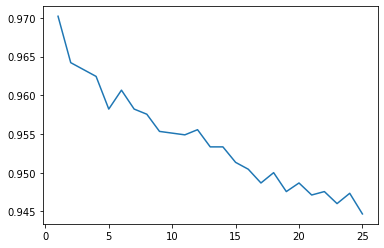

In [76]:
# To get the plotted diagram of k_range
plt.plot(k_range,scores_list)

In [77]:
# we choose random parameters to know if the employee will stay or leave the organization 
import numpy as np 
knn_custom = np.array([[1,500,3,6,0,0.90,0.89,1,8]])  
# we can not use the array like that because the difference between the numbers are large. 
# so we have to scale down the numbers 
x_knn_std = sc.transform(knn_custom)

In [78]:
x_knn_std

array([[-2.26870333,  5.99640594, -0.33921769, 16.62566037, -0.14798629,
         1.15703187,  1.01413785, -0.56082827,  0.74092587]])

In [79]:
Knn_response = knn.predict(knn_custom)

In [80]:
Knn_response

array([1], dtype=int64)

In [81]:
# we have to categories the staff that will stay and leave 
category = ["Employee will stay", "Employee will leave"]

In [82]:
print (int(knn.predict(knn_custom)))

1


In [83]:
print (category[int(knn.predict(knn_custom))])

Employee will leave
